In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from keras.utils import to_categorical
from keras.models import load_model

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
def create_dataset(mnist_img_num, tot_img = 10):
    x_arr = []
    y_arr = []
    for i in range(len(X_train)):
        if(y_train[i] == mnist_img_num[0] or y_train[i] == mnist_img_num[1]):
            x_arr.append(X_train[i])
            y_arr.append(y_train[i])
            tot_img-=1
        if(tot_img == 0):
            break
    return np.asarray(x_arr), np.asarray(y_arr)

## Initially Training a model with 1 and 2 handwritten digits

In [4]:
x, y = create_dataset([1 , 2], 100)

In [5]:
y

array([1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2], dtype=uint8)

In [6]:
y = to_categorical(y)

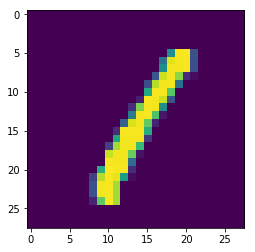

In [7]:
for i in range(1):
    plt.imshow(x[i])
    plt.show()

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
x = x.reshape((len(y), 28, 28, 1))

In [11]:
x.shape

(100, 28, 28, 1)

In [12]:
history = model.fit(x,y, epochs=25)

Epoch 1/25
100/100 [==============================] - 2s 22ms/step - loss: 68.9476 - accuracy: 0.5400
Epoch 2/25
100/100 [==============================] - 0s 280us/step - loss: 3.4938 - accuracy: 0.8500
Epoch 3/25
100/100 [==============================] - 0s 280us/step - loss: 0.2852 - accuracy: 0.9600
Epoch 4/25
100/100 [==============================] - 0s 320us/step - loss: 0.1176 - accuracy: 0.9800
Epoch 5/25
100/100 [==============================] - 0s 320us/step - loss: 0.0402 - accuracy: 0.9800
Epoch 6/25
100/100 [==============================] - 0s 280us/step - loss: 0.9519 - accuracy: 0.8900
Epoch 7/25
100/100 [==============================] - 0s 280us/step - loss: 0.0303 - accuracy: 0.9800
Epoch 8/25
100/100 [==============================] - 0s 320us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 9/25
100/100 [==============================] - 0s 320us/step - loss: 3.6861e-04 - accuracy: 1.0000
Epoch 10/25
100/100 [==============================] - 0s 280us/step - loss: 2

In [13]:
model.save('partially_trained.h5')

## Prediction for 2

In [14]:
test = np.expand_dims(x[5], axis=0)
print('Prediction: ',np.argmax(model.predict(test)[0]))
print('Actual: ', np.argmax(y[5]))
print(y[5])

Prediction:  2
Actual:  2
[0. 0. 1.]


## Prediction for 1

In [15]:
test = np.expand_dims(x[0], axis=0)
print('Prediction: ',np.argmax(model.predict(test)[0]))
print('Actual: ',np.argmax(y[0]))
print(y[0])

Prediction:  1
Actual:  1
[0. 1. 0.]


## Deleting old model and loading new model

In [16]:
del model
loaded_model = load_model('partially_trained.h5')

# Re-Training with with 0 and 2 digits

In [17]:
x, y = create_dataset([0 , 2], 100)
y = to_categorical(y)
x = x.reshape((len(y), 28, 28, 1))
print(x.shape)

(100, 28, 28, 1)


In [18]:
loaded_model.fit(x,y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 9.8660 - accuracy: 0.5200
Epoch 2/25
100/100 [==============================] - 0s 280us/step - loss: 0.1182 - accuracy: 0.9800
Epoch 3/25
100/100 [==============================] - 0s 291us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 4/25
100/100 [==============================] - 0s 280us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 5/25
100/100 [==============================] - 0s 280us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 6/25
100/100 [==============================] - 0s 320us/step - loss: 6.8776e-04 - accuracy: 1.0000
Epoch 7/25
100/100 [==============================] - 0s 320us/step - loss: 5.5207e-04 - accuracy: 1.0000
Epoch 8/25
100/100 [==============================] - 0s 320us/step - loss: 4.1387e-04 - accuracy: 1.0000
Epoch 9/25
100/100 [==============================] - 0s 319us/step - loss: 3.3588e-04 - accuracy: 1.0000
Epoch 10/25
100/100 [==============================] - 0s 280us/step

## Prediction for 0

In [19]:
testx, testy = create_dataset([1 , 0], 5)
print(testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
test = np.expand_dims(testx[0], axis=0)
print(test.shape)
print('predicted: ', np.argmax(loaded_model.predict(test)))
print('actual: ',testy[0])

[0 1 1 1 1]
(5, 28, 28, 1)
(1, 28, 28, 1)
predicted:  0
actual:  0


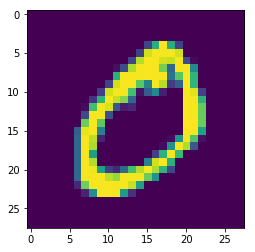

In [20]:
plt.imshow(test[0].reshape((28,28)))
# plt.suptitle(y[i])
plt.show()

## Prediction for 1

In [21]:
testx, testy = create_dataset([1 , 2], 5)
print(testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
test = np.expand_dims(testx[0], axis=0)
print(test.shape)
print('predicted: ', np.argmax(loaded_model.predict(test)))
print('actual: ',testy[0])

[1 2 1 1 1]
(5, 28, 28, 1)
(1, 28, 28, 1)
predicted:  2
actual:  1


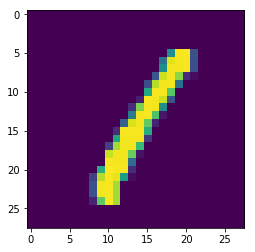

In [22]:
plt.imshow(test[0].reshape((28,28)))
# plt.suptitle(y[i])
plt.show()

## Prediction for 2

In [23]:
testx, testy = create_dataset([1 , 2], 5)
print(testy)
testx = testx.reshape((len(testy), 28, 28, 1))
print(testx.shape)
test = np.expand_dims(testx[1], axis=0)
print(test.shape)
print('predicted: ', np.argmax(loaded_model.predict(test)))
print('actual: ',testy[1])

[1 2 1 1 1]
(5, 28, 28, 1)
(1, 28, 28, 1)
predicted:  2
actual:  2


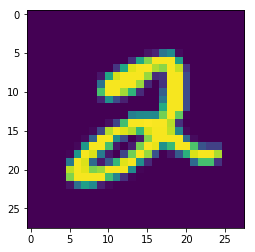

In [24]:
plt.imshow(test[0].reshape((28,28)))
plt.show()